<a href="https://colab.research.google.com/github/veronicalimpooikhoon/ITI103/blob/main/Run_flask_Web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flask Application**

Flask is a web framework in python language. This means flask provides you with tools, libraries and technologies that allow you to build a web application. This web application can be some web pages, a blog, a wiki or go as big as a web-based calendar application or a machine learning webapp.

Google Colab provides a VM(virtual machine) so we cannot access the localhost(all it does it route it to our local machine’s localhost) as we do on our local machine when running a local web server. What we can do is expose it to a public URL using ngrok. Here comes the Python library flask-ngrok.

# **1. Install flask-ngrok**

In [1]:
!pip install flask_ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **2. Create an ngrok Account**

Please go the https://dashboard.ngrok.com/get-started/setup to create an account and copy down the authtoken. ngrok is a cross-platform application that enables developers to expose a local development server to the Internet with minimal effort. The software makes your locally-hosted web server appear to be hosted on a subdomain of ngrok.com, meaning that no public IP or domain name on the local machine is needed

In [2]:
#install ngrok authtoken
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok

/drive/ngrok-ssh
--2022-06-07 15:30:48--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  13.0MB/s    in 1.0s    

2022-06-07 15:30:50 (13.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


Please replace ???? with your authtoken

In [5]:
#Example
#!/ngrok authtoken 2AF1YAP3uSbr8QRqYhhDhktvOei_5Q5RhrrR8ycdYA1Z1csgx
!/ngrok authtoken ?????

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Let navigate to content and upload the files

In [9]:
# Navigate to the location where you uploaded your files
%cd /content

/content


You can check the location of your current folder using the follwing code:

In [14]:
# Check current folder path
!pwd

/content


Upload the model.pkl and index.html file

In [12]:
# Please upload the model.pkl file and index.html file
# You may select more than one file at the same time
from google.colab import files
uploaded = files.upload()


Saving templates.zip to templates.zip
Saving model.pkl to model.pkl


In [13]:
import zipfile
from zipfile import ZipFile

file_name = '/content/templates.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted Successfully')

Extracted Successfully


Create a simple flask app

In [15]:
# Navigate to the location where you uploaded your files
%cd /content

import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

model = pickle.load(open('model.pkl', 'rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('index.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  input_values = [float(x) for x in request.form.values()]
  inp_features = [input_values]
  prediction = model.predict(inp_features)
  if prediction==1:
    return render_template('index.html', prediction_text='Death event took Place. Person is no more')
  else:
    return render_template('index.html', prediction_text='Death event not took Place. Person is alive')

app.run()

/content
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://bfad-34-90-45-20.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Jun/2022 15:38:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2022 15:38:21] "GET /favicon.ico HTTP/1.1" 404 -


Next, click on the link end with **ngrok.io** and you will be redirect to the following webpage.
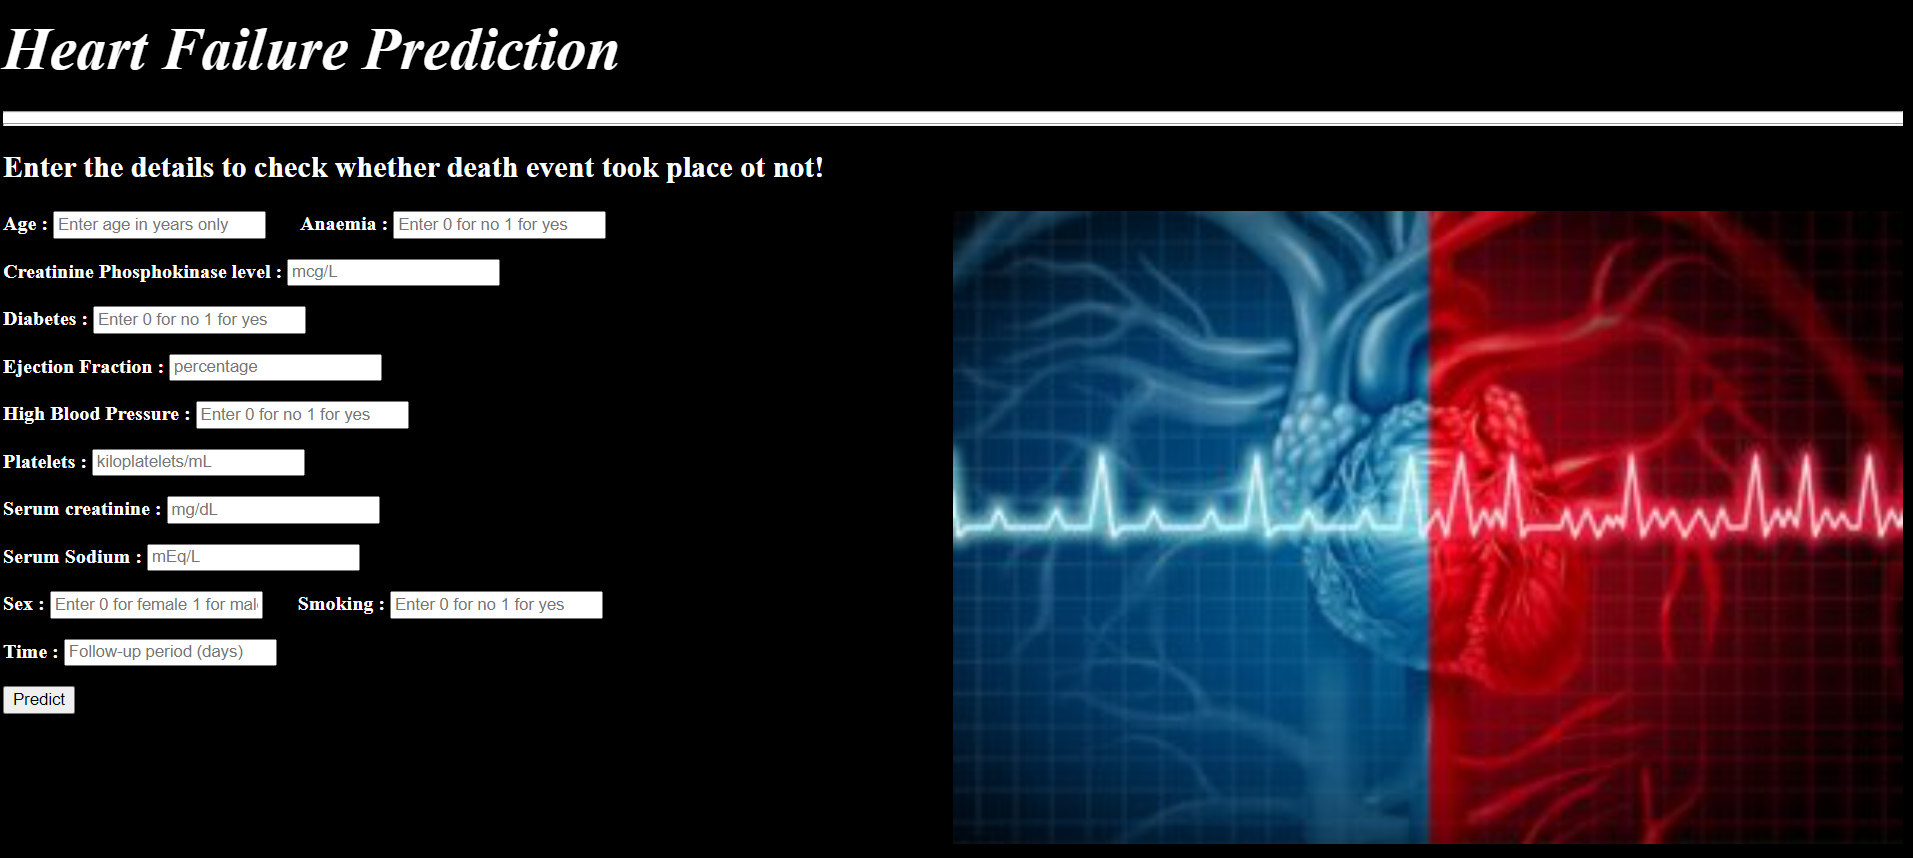


Key in the information and you will get the prediction result.